# MatplotLib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from bcb import sgs
import matplotlib.ticker as mtick
import matplotlib.dates as mdate
from datetime import datetime, timedelta
import yfinance as yf
import matplotlib as mpl
import matplotlib.pylab as lab
import mplcyberpunk

# plt.style.use("cyberpunk")

In [2]:
# retorno acum ambev e bvsp 3anos 5anos 10anos

cotacoes = yf.download('ABEV3.SA',  '2010-01-01', '2023-01-01')['Adj Close']

retornos_diarios = cotacoes.pct_change().dropna()

[*********************100%%**********************]  1 of 1 completed


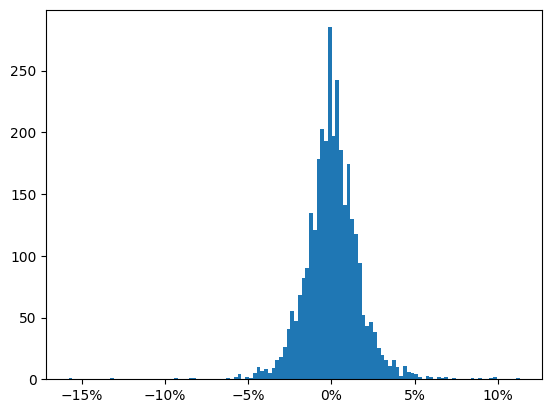

In [3]:
#histograma 
fig, ax = plt.subplots()

ax.hist(retornos_diarios.values, bins = 120)
print()
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals = 0))


In [12]:
cotacoes = yf.download(['WEGE3.SA', '^BVSP'], '2015-01-01')['Adj Close']

#pega o ultimo valor de cada ano e faz a variacao entre pares adjacentes
retornos_anuais = cotacoes.resample('Y').last().pct_change().dropna()

#cria uma coluna só com o ano, para ser usado postumamente
retornos_anuais['Ano'] = retornos_anuais.index.year

retornos_anuais

[*********************100%%**********************]  2 of 2 completed


,WEGE3.SA,^BVSP,Ano
Date,,,
2016-12-31,0.063370,0.389319,2016
2017-12-31,0.585263,0.268567,2017
2018-12-31,-0.037392,0.150323,2018
2019-12-31,1.007021,0.319467,2019
2020-12-31,1.202822,0.028819,2020
2021-12-31,-0.119122,-0.121402,2021
2022-12-31,0.188505,0.049694,2022
2023-12-31,-0.096384,0.038121,2023


## Grafico de dispersão

In [5]:
plt.style.use('cyberpunk')

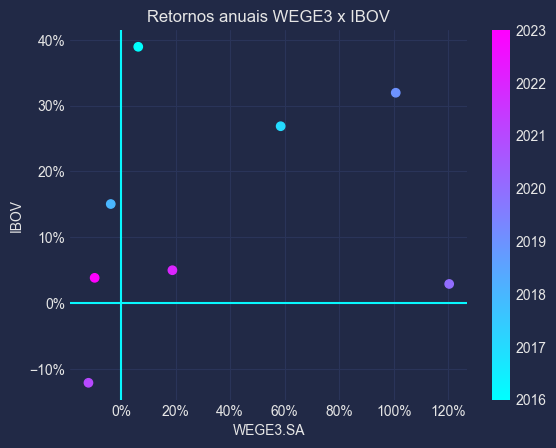

In [13]:
#plotando barra continua

fig, ax = plt.subplots()

# criando gráfico
# precisa atribuir a uma variavel para criar o colorbar
color = ax.scatter(
    retornos_anuais['WEGE3.SA'],
    retornos_anuais['^BVSP'],
    c = retornos_anuais['Ano'],
    cmap='cool')

#formatando eixos
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals= 0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals= 0))

#Setando labels nos eixos
ax.set_ylabel('IBOV')
ax.set_xlabel('WEGE3.SA')

#Traçando uma linha
ax.axhline(y=0)
ax.axvline(x=0)

ax.set_title('Retornos anuais WEGE3 x IBOV')
plt.colorbar(color)


Text(0.5, 1.0, 'Retornos anuais WEGE3 x IBOV')

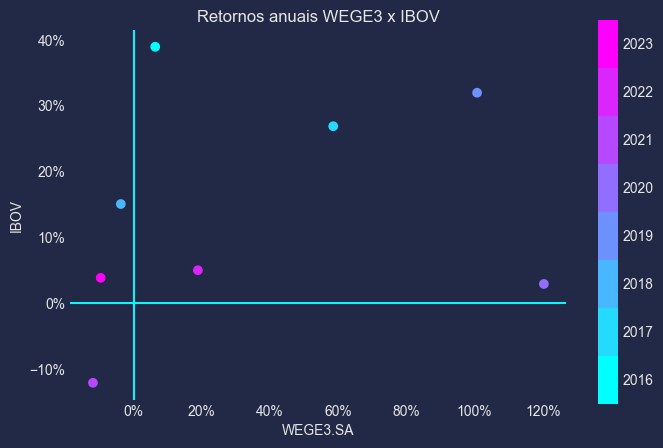

In [15]:
# plotando barra discreta

#função para seccionar a barra
# vetor_categoria vai ser a serie com os anos
def barra_discreta(vetor_categoria):
    # retorna bound, norm

    cmap = lab.cm.cool
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'cmap escolhido', cmaplist, cmap.N
    )
    bounds = np.linspace(np.min(vetor_categoria), np.max(vetor_categoria) + 0.5, len(vetor_categoria) + 1)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    return bounds, norm



#plotando
fig, ax = plt.subplots()

ax.scatter(retornos_anuais['WEGE3.SA'], retornos_anuais['^BVSP'], c = retornos_anuais['Ano'], cmap='cool')
bounds, norm = barra_discreta(retornos_anuais['Ano'])

ax.grid(False)
#barra discreta é um grafico em barra*, precisa plotalo no grafico
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap='cool', norm = norm,
    spacing='proportional', ticks= bounds + 0.5, boundaries = bounds, format = '%1i')


#formatando eixos
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals= 0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals= 0))

#Setando labels nos eixos
ax.set_ylabel('IBOV')
ax.set_xlabel('WEGE3.SA')

#Traçando uma linha
ax.axhline(y=0)
ax.axvline(x=0)

ax.set_title('Retornos anuais WEGE3 x IBOV')



## Boxplot

In [18]:
retornos_mensais = cotacoes.resample('M').last().pct_change().dropna()
retornos_mensais

,WEGE3.SA,^BVSP
Date,,
2015-02-28,-0.040629,0.099663
2015-03-31,0.042728,-0.008394
2015-04-30,0.008805,0.099296
2015-05-31,0.066085,-0.061694
2015-06-30,0.114586,0.006084
...,...,...
2023-06-30,0.005324,0.090017
2023-07-31,0.061446,0.032654
2023-08-31,-0.101202,-0.050852


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


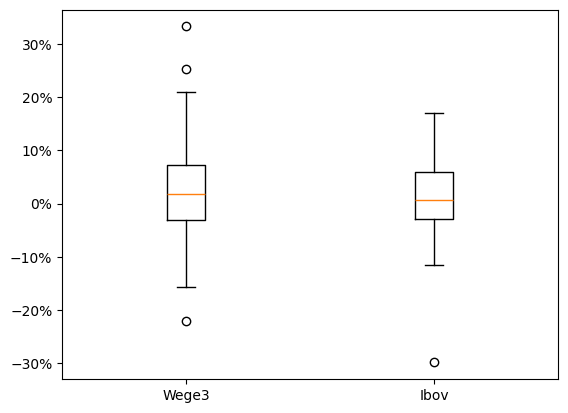

In [29]:
print(plt.style.available)
plt.style.use('default')
# plotando
fig, ax = plt.subplots()

ax.boxplot(x = retornos_mensais)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals= 0))
ax.set_xticks([1, 2], ['Wege3', 'Ibov'])

## Desafio
- histograma com retorno mensal Petro
- grafico de dispersao com retornos anuais do s&p500 x ibov

[*********************100%%**********************]  1 of 1 completed


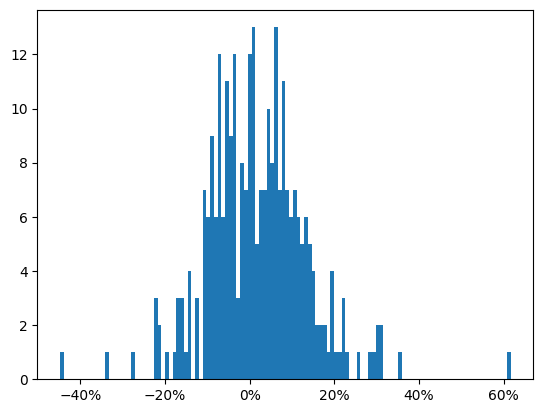

In [33]:
cotacao = yf.download('PETR4.SA')['Adj Close']
retornos_mensais = cotacao.resample('M').last().pct_change().dropna()

fig, ax = plt.subplots()

ax.hist(retornos_mensais, bins=120)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=0))


In [45]:
cotacoes = yf.download(['^BVSP', '^GSPC'], '2010-01-01')['Adj Close'].dropna()
cotacoes

[*********************100%%**********************]  2 of 2 completed


,^BVSP,^GSPC
Date,,
2010-01-04,70045.0,1132.989990
2010-01-05,70240.0,1136.520020
2010-01-06,70729.0,1137.140015
2010-01-07,70451.0,1141.689941
2010-01-08,70263.0,1144.979980
...,...,...
2023-10-10,116737.0,4358.240234
2023-10-11,117051.0,4376.950195
2023-10-13,115754.0,4327.779785


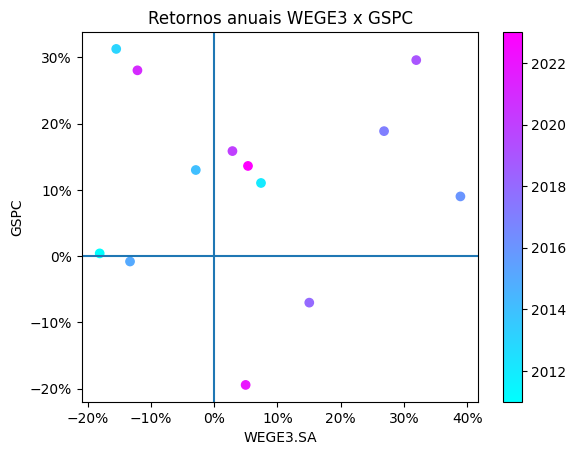

In [55]:
retornos_anuais = cotacoes.resample('Y').last().pct_change().dropna()
retornos_anuais['Ano'] = retornos_anuais.index.year

fig, ax = plt.subplots()

color = ax.scatter(retornos_anuais['^BVSP'], retornos_anuais['^GSPC'], cmap='cool', c = retornos_anuais['Ano']) #

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals= 0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals= 0))

#Setando labels nos eixos
ax.set_ylabel('GSPC')
ax.set_xlabel('WEGE3.SA')

#Traçando uma linha
ax.axhline(y=0)
ax.axvline(x=0)

ax.set_title('Retornos anuais WEGE3 x GSPC')
plt.colorbar(color)

Text(0.5, 1.0, 'Retornos anuais WEGE3 x IBOV')

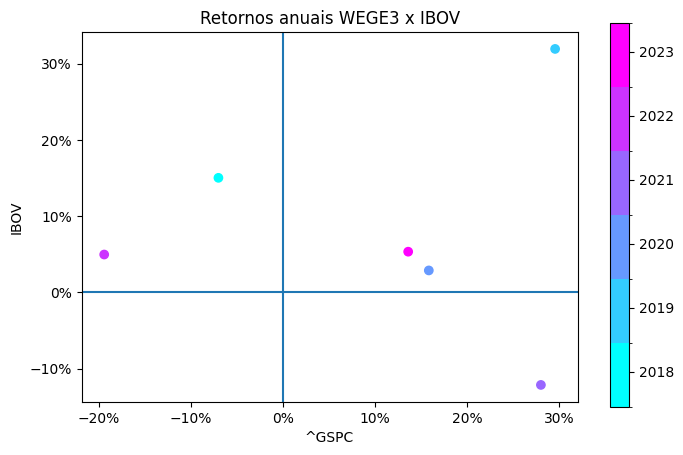

In [57]:
# plotando barra discreta
retornos_anuais = retornos_anuais[retornos_anuais.index.year > 2017]
#função para seccionar a barra
# vetor_categoria vai ser a serie com os anos
def barra_discreta(vetor_categoria):
    # retorna bound, norm

    cmap = lab.cm.cool
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'cmap escolhido', cmaplist, cmap.N
    )
    bounds = np.linspace(np.min(vetor_categoria), np.max(vetor_categoria) + 0.5, len(vetor_categoria) + 1)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    return bounds, norm



#plotando
fig, ax = plt.subplots()

ax.scatter(retornos_anuais['^GSPC'], retornos_anuais['^BVSP'], c = retornos_anuais['Ano'], cmap='cool')
bounds, norm = barra_discreta(retornos_anuais['Ano'])

ax.grid(False)
#barra discreta é um grafico em barra*, precisa plotalo no grafico
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(ax2, cmap='cool', norm = norm,
    spacing='proportional', ticks= bounds + 0.5, boundaries = bounds, format = '%1i')


#formatando eixos
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1, decimals= 0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals= 0))

#Setando labels nos eixos
ax.set_ylabel('IBOV')
ax.set_xlabel('^GSPC')

#Traçando uma linha
ax.axhline(y=0)
ax.axvline(x=0)

ax.set_title('Retornos anuais WEGE3 x IBOV')

